<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект 2: Анализ вакансий из HeadHunter
   

In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import requests 
from bs4 import BeautifulSoup


#отключаем обрезание текста в display
pd.set_option('display.max_colwidth', None)

# параметры подключения
from config import *

In [2]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)


# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса

query_3_1 = f'''
SELECT
    COUNT(public.vacancies.id)
FROM
    public.vacancies
        '''


In [5]:
# результат запроса
vac_n = pd.read_sql_query(query_3_1, connection)
display(vac_n)

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\3120446735.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vac_n = pd.read_sql_query(query_3_1, connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
query = f'''
SELECT
    COUNT(*) employers_entries,
    COUNT(name) employers_opened,
    COUNT(DISTINCT name) employers_unic
FROM
    employers
        '''
emp_n = pd.read_sql_query(query, connection)
display(emp_n)
print(f"Всего записей в таблице employers {emp_n['employers_entries'][0]}, пустых полей в столбце",
     f"с наименованием работодателей нет. Уникальных наименований работодателей {emp_n['employers_unic'][0]},",
     f"что составляет более {int(emp_n['employers_unic'][0]/emp_n['employers_entries'][0] * 100)}%.",
     f"Посмотрим, что означают дубли в справочнике работодателей.")
query = f'''
SELECT
    e.id first_id,
	a.id second_id,
	e.name,
	e.area first_area,
	a.area second_area
FROM
    employers e
	CROSS JOIN employers a
WHERE e.name = a.name AND e.id <> a.id
ORDER BY e.name
OFFSET 44
LIMIT 10
        '''
emp_dubl = pd.read_sql_query(query, connection)
display(emp_dubl)
print(f"Видно, что работодатели с одинаковыми наименованиями встречаются в двух, а то и в трех разных", 
      f"регионах. Посмотрим, встречаются ли в одном регионе работодатели с одинаковым наименованием:")
query = f'''
SELECT
    e.id first_id,
	a.id second_id,
	e.name,
	e.area first_area,
	a.area second_area
FROM
    public.employers e
	CROSS JOIN public.employers a
WHERE e.name = a.name AND e.id < a.id AND e.area = a.area
ORDER BY e.name
OFFSET 14
LIMIT 10
        '''
emp_dubl_reg = pd.read_sql_query(query, connection)
display(emp_dubl_reg)
print(f"Да, в одном регионе названия работодателей тоже могут повторяться, отличать их можно только по id.")

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\4038510429.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  emp_n = pd.read_sql_query(query, connection)


,employers_entries,employers_opened,employers_unic
0,23501,23501,23175


Всего записей в таблице employers 23501, пустых полей в столбце с наименованием работодателей нет. Уникальных наименований работодателей 23175, что составляет более 98%. Посмотрим, что означают дубли в справочнике работодателей.


C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\4038510429.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  emp_dubl = pd.read_sql_query(query, connection)


,first_id,second_id,name,first_area,second_area
0,916477,2508807,Автомастер,71,1641
1,2508807,916477,Автомастер,1641,71
2,5908512,214174,Автосила,2041,26
3,214174,5908512,Автосила,26,2041
4,4556149,3385635,Агросервис,58,1
5,3070902,4556149,Агросервис,1546,58
6,3070902,3385635,Агросервис,1546,1
7,4556149,3070902,Агросервис,58,1546
8,3385635,4556149,Агросервис,1,58
9,3385635,3070902,Агросервис,1,1546


C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\4038510429.py:50: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  emp_dubl_reg = pd.read_sql_query(query, connection)


Видно, что работодатели с одинаковыми наименованиями встречаются в двух, а то и в трех разных регионах. Посмотрим, встречаются ли в одном регионе работодатели с одинаковым наименованием:


,first_id,second_id,name,first_area,second_area
0,1019812,5360841,Новые Технологии,2,2
1,1969799,5367608,Новые Технологии,1,1
2,4339988,5164580,Перспектива,1,1
3,735079,4344000,Перспектива,1,1
4,4339988,4344000,Перспектива,1,1
5,735079,4339988,Перспектива,1,1
6,4344000,5164580,Перспектива,1,1
7,735079,5164580,Перспектива,1,1
8,5713293,6005135,РОСТ,1,1
9,5001382,5950821,РСК,2,2


Да, в одном регионе названия работодателей тоже могут повторяться, отличать их можно только по id.


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [7]:
# текст запроса
query = f'''
SELECT
    COUNT(*) areas_entries,
    COUNT(name) areas_opened,
    COUNT(DISTINCT name) areas_unic
FROM
    public.areas
        '''
ar_n = pd.read_sql_query(query, connection)
display(ar_n)
print(f"Все записи в таблице areas уникальны.")

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\3286050785.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ar_n = pd.read_sql_query(query, connection)


,areas_entries,areas_opened,areas_unic
0,1362,1362,1362


Все записи в таблице areas уникальны.


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [8]:
# текст запроса
query = f'''
SELECT
    COUNT(*) industries_entries,
    COUNT(name) industries_opened,
    COUNT(DISTINCT name) industries_unic
FROM
    industries
        '''
ind_n = pd.read_sql_query(query, connection)
display(ind_n)
print(f"Все записи в таблице industries уникальны. Посмотрим на них:")
query = f'''
SELECT
    name
FROM
    industries
ORDER BY 1
OFFSET 20
LIMIT 10
        '''
ind_p = pd.read_sql_query(query, connection)
display(ind_p)
print(f"Видно, что формулировки формализованы, т.е. команда",
      f"сайта вакансий провела работу над созданием справочника по сферам деятельности.")

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\2784657258.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ind_n = pd.read_sql_query(query, connection)


,industries_entries,industries_opened,industries_unic
0,294,294,294


Все записи в таблице industries уникальны. Посмотрим на них:


C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\2784657258.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ind_p = pd.read_sql_query(query, connection)


,name
0,"Безалкогольные напитки (продвижение, оптовая торговля)"
1,Безалкогольные напитки (производство)
2,"Безопасность, охранная деятельность"
3,"Бетон, кирпич, стекло и прочие силикаты (продвижение, оптовая торговля)"
4,"Бетон, кирпич, стекло и прочие силикаты (производство)"
5,Бизнес-образование
6,Благотворительная организация
7,Благоустройство и уборка территорий и зданий
8,"Ботанический сад, зоопарк, заповедник"
9,"Бытовая техника, электроника, климатическое оборудование (монтаж, сервис, ремонт)"


Видно, что формулировки формализованы, т.е. команда сайта вакансий провела работу над созданием справочника по сферам деятельности.


***

Итак, в базе представлены 49 тысяч вакансий, всего на сайте зарегистрировались 23 тысячи работодателей, а специалисты по рекрутингу выделили порядка 300 направлений хозяйственной деятельности.

По последним официальным данным доля лиц трудоспособного возраста составляла 56.3% населения РФ, т.е. 83 млн человек. Уровень безработицы колеблется вокруг 5% рабочей силы, т.е. в стране около 4 млн безработных. По имеющимся в базе вакансиям получится трудоустроить только 1% официально безработных.

При этом, можем ли мы сказать, что от каждого работодателя поступило, в среднем, по две вакансии? Нет, для этого нужны перекрестные запросы из таблиц, т.е. мы пока не можем утверждать, что все работодатели в базе активные (имеют размещенные вакансии).

Так же мы пока не можем говорить о географии работодателей, т.к. в таблице areas представлены как отдельные города, так и регионы РФ, а вдобавок и другие страны. Т.е. имеем очень разную географическую детализацию в одном справочнике.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [9]:
# текст запроса
query = f'''
WITH x AS
(SELECT    --Подзапрос: регион-количество вакансий          
    a.name area,
    COUNT(*) cnt
FROM
    public.vacancies v
	JOIN areas a ON a.id = v.area_id
GROUP BY area
ORDER BY cnt DESC)
(SELECT
    area,
	cnt
FROM x
LIMIT 5)
UNION ALL
(SELECT
    'all areas with vacancies',
	COUNT(cnt)
FROM x)
UNION ALL
(SELECT
    'with 1 vacancy',
	COUNT(cnt)
FROM x
WHERE cnt = 1)
        '''



In [10]:
# результат запроса
vac_ar = pd.read_sql_query(query, connection)
display(vac_ar)

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\1330234057.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vac_ar = pd.read_sql_query(query, connection)


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
5,all areas with vacancies,769
6,with 1 vacancy,193


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [11]:
# текст запроса
query = f'''
SELECT
    '1. both filled' fill,
    COUNT(*) cnt
FROM
    public.vacancies 
WHERE salary_from IS NOT NULL AND salary_to IS NOT NULL
UNION ALL
SELECT
    '2. only one filled' fill,
    COUNT(*) cnt
FROM
    public.vacancies 
WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
UNION ALL
SELECT
    '3. no one filled' fill,
    COUNT(*) cnt
FROM
    public.vacancies 
WHERE salary_from IS NULL AND salary_to IS NULL
UNION ALL
SELECT
    '4. filled with zeros',
    COUNT(*) cnt
FROM
    public.vacancies 
WHERE salary_from = 0 OR salary_to = 0
ORDER BY fill
        '''


In [12]:
# результат запроса
var_sal = pd.read_sql_query(query, connection)
display(var_sal)

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\2349009775.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  var_sal = pd.read_sql_query(query, connection)


,fill,cnt
0,1. both filled,10102
1,2. only one filled,24073
2,3. no one filled,25124
3,4. filled with zeros,0


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [13]:
# текст запроса
query = f'''
SELECT
    'mean' agg,
	ROUND(AVG(salary_from)) salary_low,
    ROUND(AVG(salary_to)) salary_up
FROM
    public.vacancies
UNION ALL
SELECT
    'median',
    ROUND(PERCENTILE_CONT(0.5) WITHIN GROUP(ORDER BY salary_from)),
    ROUND(PERCENTILE_CONT(0.5) WITHIN GROUP(ORDER BY salary_to))
FROM
    public.vacancies
ORDER BY agg
        '''

In [14]:
# результат запроса
avg_sal = pd.read_sql_query(query, connection)
display(avg_sal)

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\517509928.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_sal = pd.read_sql_query(query, connection)


,agg,salary_low,salary_up
0,mean,71065.0,110537.0
1,median,50000.0,80000.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [15]:
# текст запроса
query = f'''
SELECT
    schedule,
	employment,
    COUNT(*) cnt
FROM
    public.vacancies 
GROUP BY schedule, employment
ORDER BY cnt DESC
LIMIT 7
        '''

In [16]:
# результат запроса

sch_emp = pd.read_sql_query(query, connection)
display(sch_emp)

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\2219166465.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sch_emp = pd.read_sql_query(query, connection)


,schedule,employment,cnt
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [17]:
# текст запроса
query = f'''
SELECT
    experience,
    COUNT(*) cnt,
	ROUND(COUNT(*) * 100 / (SUM(COUNT(*)) OVER()))::smallint perc
FROM
    public.vacancies 
GROUP BY experience
ORDER BY cnt
        '''

In [18]:
# результат запроса
exp_vac = pd.read_sql_query(query, connection)
display(exp_vac)

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\1384565979.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  exp_vac = pd.read_sql_query(query, connection)


,experience,cnt,perc
0,Более 6 лет,1337,3
1,Нет опыта,7197,15
2,От 3 до 6 лет,14511,29
3,От 1 года до 3 лет,26152,53


***

#Выводы

53% предложений рассчитаны на специалистов с небольшим опытом работы, к ним добавляются 15% вакансий от работодателей, которым нужны самые дешевые исполнители без опыта работы. И только треть позиций подразумевают найм специалистов с опытом работы более 3 лет, т.е. более высокую оплату за наличие ценных компетенций. Возможны два варианта:
 - работодатели ищут высококвалифицированных специалистов по другим источникам,
 - ситуация на рынке такова, что клиенты выбирают самые дешевые работы/услуги, не смотря на снижение качества, соответственно, в этих отраслях не нужны дорогие высококвалифицированные кадры. 

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\1210581701.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sal_ar = pd.read_sql_query(query, connection)


Посмотрим как зависит вилка зарплат от региона. Возьмем медиану как показатель, менее зависимый от выбросов:


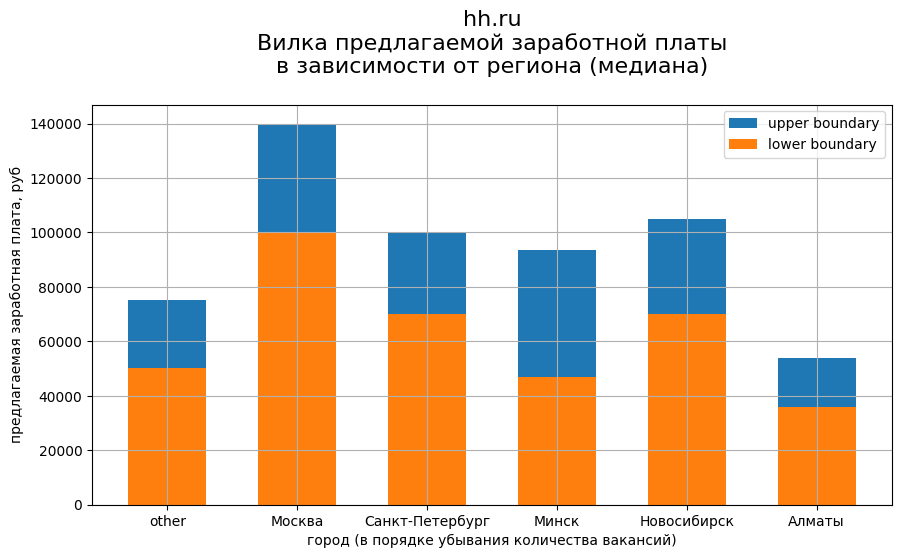

И отдельно посмотрим для Москвы разброс предлагаемой зарплаты в зависимости от опыта кандидатов:


C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\1210581701.py:50: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  exp_msc = pd.read_sql_query(query, connection)


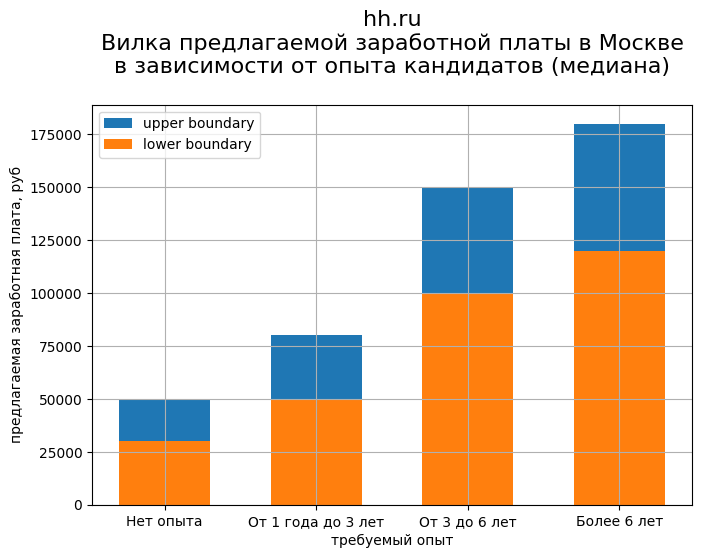

In [19]:
query = f'''
SELECT
    CASE WHEN a.name NOT IN ('Москва', 'Санкт-Петербург', 'Минск', 'Новосибирск', 'Алматы') 
         THEN 'other' ELSE a.name END area,
	COUNT(*) cnt,
    ROUND(PERCENTILE_CONT(0.5) WITHIN GROUP(ORDER BY salary_from)) salary_low,
    ROUND(PERCENTILE_CONT(0.5) WITHIN GROUP(ORDER BY salary_to)) salary_up
FROM
    public.vacancies v
	JOIN areas a ON a.id = v.area_id
GROUP BY area
ORDER BY cnt DESC
        '''
sal_ar = pd.read_sql_query(query, connection)
print("Посмотрим как зависит вилка зарплат от региона. Возьмем медиану как",
      f"показатель, менее зависимый от выбросов:")
fig = plt.figure(figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(
    sal_ar['area'],
    sal_ar['salary_up'],
    width=0.6,
    label='upper boundary'
    )
ax.bar(
    sal_ar['area'],
    sal_ar['salary_low'],
    width=0.6,
    label='lower boundary'
    )
ax.set_title(f'hh.ru\nВилка предлагаемой заработной платы\n'
               + 'в зависимости от региона (медиана)\n', 
               fontsize=16)
ax.set_xlabel('город (в порядке убывания количества вакансий)')
ax.set_ylabel('предлагаемая заработная плата, руб')
ax.legend()
ax.grid()
plt.show()

query = f'''
SELECT
    experience,
    ROUND(PERCENTILE_CONT(0.5) WITHIN GROUP(ORDER BY salary_from)) salary_low,
    ROUND(PERCENTILE_CONT(0.5) WITHIN GROUP(ORDER BY salary_to)) salary_up
FROM
    public.vacancies 
GROUP BY experience
ORDER BY salary_up
        '''
exp_msc = pd.read_sql_query(query, connection)
print("И отдельно посмотрим для Москвы разброс предлагаемой зарплаты в зависимости",
      f"от опыта кандидатов:")
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(
    exp_msc['experience'],
    exp_msc['salary_up'],
    width=0.6,
    label='upper boundary'
    )
ax.bar(
    exp_msc['experience'],
    exp_msc['salary_low'],
    width=0.6,
    label='lower boundary'
    )
ax.set_title(f'hh.ru\nВилка предлагаемой заработной платы в Москве\n'
               + 'в зависимости от опыта кандидатов (медиана)\n', 
               fontsize=16)
ax.set_xlabel('требуемый опыт')
ax.set_ylabel('предлагаемая заработная плата, руб')
ax.legend()
ax.grid()
plt.show()

Видно, что в Москве нижняя планка по предлагаемой зарплате находится на уровне верхней планки трех других городов-лидеров по количеству открытых вакансий. И если верхняя планка в Новосибирске, Петербурге и Минске практически совпадает, то начинается предложение в Минске от существенно меньших уровней. В старой столице Казахстана верхняя планка по зарплате практически в два раза ниже, чем в столице Беларуси, и почти в три раза ниже, чем в Москве.

Рассматривая вилку по заработной плате в зависимости от опыта кандидатов, можем сказать, что получив опыт работы от года до трех лет, соискатель в Москве переходит из диапазона зарплат ниже 50 тысяч рублей, в диапазон, который начинается от 50 тысяч. Но наибольший качественный скачок, по мнению работодателей, происходит при опыте работы от трех до шести лет. Те, кто ищут опытные кадры, поднимают вилку предлагаемых зарплат в два раза по сравнению с предложением менее опытным кандидатам. Для привлечения еще более маститых специалистов компании рассчитывают, видимо, уже не столько на кратное увеличение зарплат, сколько на другие составляющие мотивационного пакета.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [20]:
# текст запроса
query = f'''
WITH x AS
(SELECT
    e.name employer,
	COUNT(*) cnt
FROM
    public.vacancies v
	JOIN employers e ON e.id = v.employer_id
GROUP BY employer
ORDER BY cnt DESC)
(SELECT employer, cnt FROM x
LIMIT 1)
UNION ALL
(SELECT employer, cnt FROM x
OFFSET 4
LIMIT 1)
UNION ALL
(SELECT 'всего работодателей', COUNT(*) FROM x)
        '''

In [21]:
# результат запроса
emp_vac = pd.read_sql_query(query, connection)
display(emp_vac)

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\2595481692.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  emp_vac = pd.read_sql_query(query, connection)


,employer,cnt
0,Яндекс,1933
1,Газпром нефть,331
2,всего работодателей,14766


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [22]:
# текст запроса
query = f'''
WITH vac AS
(SELECT                         -- Подзапрос: вакансии по регионам
    a.name area,
    COUNT(v.id) vacancies
FROM
    areas a 
    LEFT JOIN vacancies v ON a.id = v.area_id
GROUP BY a.name),
emp AS
(SELECT                         -- Подзапрос: работодатели по регионам
    a.name area,
    COUNT(e.id) employers
FROM
    areas a 
    LEFT JOIN employers e ON a.id = e.area
GROUP BY a.name)
SELECT area
FROM vac JOIN emp USING(area)
WHERE vacancies = 0
ORDER BY employers DESC
LIMIT 10
        '''

In [23]:
# результат запроса
ar_emp_vac = pd.read_sql_query(query, connection)
display(ar_emp_vac)

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\219811783.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ar_emp_vac = pd.read_sql_query(query, connection)


,area
0,Россия
1,Казахстан
2,Московская область
3,Краснодарский край
4,Ростовская область
5,Беларусь
6,Азербайджан
7,Нижегородская область
8,Республика Татарстан
9,Узбекистан


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [24]:
# текст запроса
query = f'''
SELECT
    e.name employers,
    COUNT(DISTINCT a.id) areas
FROM
    employers e 
    LEFT JOIN vacancies v ON e.id = v.employer_id
	LEFT JOIN areas a ON a.id = v.area_id
GROUP BY e.name
ORDER BY areas DESC	
LIMIT 10
        '''

In [25]:
# результат запроса
emp_ar = pd.read_sql_query(query, connection)
display(emp_ar)

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\341891852.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  emp_ar = pd.read_sql_query(query, connection)


,employers,areas
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
5,Совкомбанк,63
6,МТС,55
7,"ЭФКО, Управляющая компания",49
8,Почта России,48
9,КРОН,48


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [26]:
# текст запроса
query = f'''
SELECT COUNT(*) employers_no_industries FROM
(SELECT
    e.name employers,
    COUNT(i.industry_id) industries
FROM
    employers e 
    LEFT JOIN employers_industries i ON e.id = i.employer_id
GROUP BY e.id
HAVING COUNT(i.industry_id) = 0) employers_no_industries
        '''

In [27]:
# результат запроса
emp_ind = pd.read_sql_query(query, connection)
display(emp_ind)

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\4234528031.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  emp_ind = pd.read_sql_query(query, connection)


,employers_no_industries
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [28]:
# текст запроса
query = f'''
SELECT
    e.name employers
FROM
    employers e 
    JOIN employers_industries i ON e.id = i.employer_id
GROUP BY e.id
HAVING COUNT(i.industry_id) = 4
ORDER BY employers
OFFSET 2
LIMIT 1
        '''

In [29]:
# результат запроса
emp_four = pd.read_sql_query(query, connection)
display(emp_four)

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\231780726.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  emp_four = pd.read_sql_query(query, connection)


,employers
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [30]:
# текст запроса
query = f'''
SELECT COUNT(*) employers_po FROM
(SELECT
    DISTINCT i.employer_id
FROM
    employers_industries i
    JOIN industries inm ON inm.id = i.industry_id 
            AND inm.name = 'Разработка программного обеспечения'
) emp_po
        '''

In [31]:
# результат запроса
emp_po = pd.read_sql_query(query, connection)
display(emp_po)

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\623047527.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  emp_po = pd.read_sql_query(query, connection)


,employers_po
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [32]:
# код для получения списка городов-милионников
#Для упрощения поиска обратимся не к самой статье Википедии, 
# а к примененному в ней шаблону:
req = requests.get('https://ru.wikipedia.org/wiki/%D0%A8%D0%B0%D0%B1%D0%BB%D0%BE%D0%BD:%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8')
print("получен ответ", req.status_code == 200)
wiki = BeautifulSoup(req.text, 'html.parser')
cities = set()
navcont = wiki.find('div', class_='NavContent')
for a in navcont.find_all('a'):
    cities.add(a.text)
print(cities)

получен ответ True
{'Ростов-на-Дону', 'Омск', 'Воронеж', 'Новосибирск', 'Пермь', 'Санкт-Петербург', 'Челябинск', 'Краснодар', 'Уфа', 'Москва', 'Екатеринбург', 'Красноярск', 'Волгоград', 'Казань', 'Нижний Новгород', 'Самара'}


In [33]:
# текст запроса
query = f'''
WITH ya AS (SELECT id FROM employers WHERE name='Яндекс'),  -- id Яндекса
cities AS (SELECT id, name FROM areas                       -- id городов-миллионников
		   WHERE name IN {tuple(_ for _ in cities)}),   -- Передаем полученное множество через итератор
vac AS (SELECT                   -- Подзапрос: количество вакансий в городах с предложениями от Яндекса
    c.name cities,
    COUNT(v.id)::int vacancies
FROM
    vacancies v 
	JOIN ya ON ya.id = v.employer_id
    JOIN cities c ON c.id = v.area_id
GROUP BY c.name
ORDER BY vacancies)
SELECT * FROM vac
UNION ALL
SELECT 'Total', SUM(vacancies) FROM vac
UNION ALL
SELECT 'Mean', SUM(vacancies)/COUNT(*) FROM vac
        '''

In [34]:
# результат запроса
ya_vac = pd.read_sql_query(query, connection)
display(ya_vac)

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\3842282596.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ya_vac = pd.read_sql_query(query, connection)


,cities,vacancies
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

Всего из 1933 вакансий от Яндекса 485, то есть 1/4, размещены в городах-миллионниках. В среднем на каждый город-миллионник приходится по 30 вакансий от Яндекса.

In [35]:
print("Посмотрим как относятся к удаленной работе компании, указавшие среди видов",
      f"деятельности Разработку программного обеспечения:")
query = f'''
WITH emp_po AS
(SELECT                          -- Подзапрос: id поставщиков, указавших разработку ПО
    DISTINCT i.employer_id id
FROM
    employers_industries i
    JOIN industries inm ON inm.id = i.industry_id 
            AND inm.name = 'Разработка программного обеспечения'), 
sch AS (SELECT                   -- Подзапрос: тип занятости в вакансиях разработчиков ПО
    v.schedule schedule
FROM
    vacancies v 
	JOIN emp_po po ON po.id = v.employer_id)
SELECT
    'Удаленная работа' schedule,
	COUNT(*) cnt
FROM sch
WHERE schedule = 'Удаленная работа'
UNION ALL
SELECT
    'Классические виды занятости' schedule,
	COUNT(*) cnt
FROM sch
WHERE schedule <> 'Удаленная работа'
UNION ALL
SELECT
    'Удаленная работа всего' schedule,
	COUNT(*) cnt
FROM vacancies
WHERE schedule = 'Удаленная работа'
        '''
rem_po = pd.read_sql_query(query, connection)
display(rem_po)
print(f"Из всех {rem_po['cnt'][2]} предложений удаленной работы {rem_po['cnt'][0]}, т.е.",
      f"треть, приходится на вакансии компаний, занимающихся Разработкой программного",
      f"обеспечения.\nПри этом сами Разработчики ПО размещают в три раза больше вакансий",
      f"с классическими видами 'присутствия на работе' - {rem_po['cnt'][1]}, чем",
      f"предложения работать удаленно.\n\nПосмотрим какие еще сферы деятельности указали",
      f"компании, выбравшие Разработку программного обеспечения как одно из направлений:")
query = f'''
WITH emp_po AS (SELECT
    DISTINCT i.employer_id id
FROM
    employers_industries i
    JOIN industries inm ON inm.id = i.industry_id 
            AND inm.name = 'Разработка программного обеспечения')	
SELECT
    COUNT(*) cnt,
    inm.name industry
FROM
    industries inm
	JOIN employers_industries i ON inm.id = i.industry_id
	JOIN emp_po e ON e.id = i.employer_id 
GROUP BY inm.name
ORDER BY cnt DESC
LIMIT 7
        '''
po_oth = pd.read_sql_query(query, connection)
display(po_oth)
print(f"Выделяются вторая и третья позиции, которые перекрываются с разработкой ПО наполовину",
      f"и на четверть. Другие направления деятельности из верхней части таблицы, хоть и",
      f"показывают существенно меньше совпадений, также являются логичными параллельными",
      f"видами деятельности.\nИнтересно, что банки занимают только 19-е место и имеют всего",
      f"22 совпадения, хотя в современной России конкуренция заставляет все банки развивать",
      f"ИТ-направление.",
      f"\nЗато ближе к концу списка встречаются совсем неожиданные смежные отрасли, такие как",
      f"Такси, Мясная и Молочная продукция. Видимо, эти работодатели указывали разработку ПО",
      f"при размещении вакансии на должность местного ИТ-специалиста, т.е. имели ввиду",
      f"программирование не для клиентов, а для внутреннего потребления.")

Посмотрим как относятся к удаленной работе компании, указавшие среди видов деятельности Разработку программного обеспечения:


C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\414184354.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  rem_po = pd.read_sql_query(query, connection)


,schedule,cnt
0,Удаленная работа,3068
1,Классические виды занятости,9431
2,Удаленная работа всего,9311


C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\414184354.py:60: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  po_oth = pd.read_sql_query(query, connection)


Из всех 9311 предложений удаленной работы 3068, т.е. треть, приходится на вакансии компаний, занимающихся Разработкой программного обеспечения.
При этом сами Разработчики ПО размещают в три раза больше вакансий с классическими видами 'присутствия на работе' - 9431, чем предложения работать удаленно.

Посмотрим какие еще сферы деятельности указали компании, выбравшие Разработку программного обеспечения как одно из направлений:


,cnt,industry
0,3553,Разработка программного обеспечения
1,1775,"Системная интеграция, автоматизации технологических и бизнес-процессов предприятия, ИТ-консалтинг"
2,845,"Интернет-компания (поисковики, платежные системы, соц.сети, информационно-познавательные и развлекательные ресурсы, продвижение сайтов и прочее)"
3,204,Консалтинговые услуги
4,189,"Маркетинговые, рекламные, BTL, дизайнерские, Event-, PR-агентства, организация выставок"
5,93,"Электронно-вычислительная, оптическая, контрольно-измерительная техника, радиоэлектроника, автоматика (производство)"
6,66,"Производство мультимедиа, контента, редакторская деятельность"


Выделяются вторая и третья позиции, которые перекрываются с разработкой ПО наполовину и на четверть. Другие направления деятельности из верхней части таблицы, хоть и показывают существенно меньше совпадений, также являются логичными параллельными видами деятельности.
Интересно, что банки занимают только 19-е место и имеют всего 22 совпадения, хотя в современной России конкуренция заставляет все банки развивать ИТ-направление. 
Зато ближе к концу списка встречаются совсем неожиданные смежные отрасли, такие как Такси, Мясная и Молочная продукция. Видимо, эти работодатели указывали разработку ПО при размещении вакансии на должность местного ИТ-специалиста, т.е. имели ввиду программирование не для клиентов, а для внутреннего потребления.


# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [36]:
# текст запроса
query = f'''
SELECT
    COUNT(v.name) vacancies
FROM
    vacancies v 
WHERE lower(v.name) LIKE '%%data%%' OR lower(v.name) LIKE '%%данн%%'
        '''

In [37]:
# результат запроса
vac_dt = pd.read_sql_query(query, connection)
display(vac_dt)

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\415835366.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vac_dt = pd.read_sql_query(query, connection)


,vacancies
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [38]:
# текст запроса
query = f'''
SELECT
    COUNT(*)
FROM
    vacancies	
WHERE (lower(name) LIKE '%%data scien%%'
    OR lower(name) LIKE '%%исследователь данных%%'
    OR lower(name) similar to  '%%[/|]ml%%'  AND name NOT LIKE '%%HTML%%'
    OR lower(name) LIKE '%%machine learning%%' 
    OR lower(name) LIKE '%%машинн%%обучен%%') AND
    (lower(name) LIKE '%%junior%%'
    OR experience LIKE '%%Нет опыта%%'
    OR employment LIKE '%%Стажировка%%')
        '''

In [39]:
# результат запроса
ds_jun = pd.read_sql_query(query, connection)
display(ds_jun)

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\2816904902.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ds_jun = pd.read_sql_query(query, connection)


,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [40]:
# текст запроса
query = f'''
(SELECT
    'SQL & postgres' cat,
    COUNT(*) cnt
FROM
    vacancies	
WHERE (lower(name) LIKE '%%data scien%%'
    OR lower(name) LIKE '%%исследователь данных%%'
    OR name LIKE '%%ML%%' AND name NOT LIKE '%%HTML%%'
    OR lower(name) LIKE '%%machine learning%%' 
    OR lower(name) LIKE '%%машинн%%обучен%%') AND
    (lower(key_skills) LIKE '%%postgres%%'
    OR key_skills LIKE '%%SQL%%'))
UNION ALL
(SELECT
    'all DS',
    COUNT(*)
FROM
    vacancies	
WHERE (lower(name) LIKE '%%data scien%%'
    OR lower(name) LIKE '%%исследователь данных%%'
    OR name LIKE '%%ML%%' AND name NOT LIKE '%%HTML%%'
    OR lower(name) LIKE '%%machine learning%%' 
    OR lower(name) LIKE '%%машинн%%обучен%%'))
        '''



In [41]:
# результат запроса

ds_sql = pd.read_sql_query(query, connection)
display(ds_sql)

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\3703297819.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ds_sql = pd.read_sql_query(query, connection)


,cat,cnt
0,all DS,482
1,SQL & postgres,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [42]:
# текст запроса
query = f'''
SELECT
    'Python' cat,
    COUNT(*) cnt
FROM
    vacancies	
WHERE (name ilike '%%data scientist%%'
    OR name ilike '%%data science%%'
    OR name ILIKE '%%исследователь данных%%'
    OR name LIKE  '%%ML%%'  AND name NOT ILIKE '%%HTML%%'
    OR name ILIKE '%%machine learning%%' 
    OR name ILIKE '%%машинн%%обучен%%') AND
    (lower(key_skills) LIKE '%%python%%')
        '''

In [43]:
# результат запроса
ds_py = pd.read_sql_query(query, connection)
display(ds_py)

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\552355667.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ds_py = pd.read_sql_query(query, connection)


,cat,cnt
0,Python,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [44]:
# текст запроса

query = f'''
SELECT
    COUNT(*) skill,
    COUNT(DISTINCT id) vacancy,
    ROUND(COUNT(*)::numeric / COUNT(DISTINCT id), 2) avg
FROM
(SELECT                  -- Подзапрос: id вакансий с key_skills, разделенными по табуляции 
    id,
	regexp_split_to_table(key_skills, CHR(9)) skill
FROM
    vacancies	
WHERE (lower(name) LIKE '%%data scientist%%'
	OR lower(name) LIKE '%%data science%%'
    OR lower(name) LIKE '%%исследователь данных%%'
    OR name LIKE '%%ML%%' AND name NOT LIKE '%%HTML%%'
    OR lower(name) LIKE '%%machine learning%%' 
    OR lower(name) LIKE '%%машинн%%обучен%%')
	AND key_skills IS NOT NULL
) skills
        '''

In [45]:
# результат запроса

ds_skl = pd.read_sql_query(query, connection)
display(ds_skl)

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\2496787381.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ds_skl = pd.read_sql_query(query, connection)


,skill,vacancy,avg
0,2761,431,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [46]:
# текст запроса
query = f'''
SELECT
    experience,
	AVG(CASE WHEN salary_from IS NULL THEN salary_to
	     WHEN salary_to IS NULL THEN salary_from
		 ELSE (salary_from + salary_to)/2
        END)::integer
FROM
    vacancies	
WHERE (lower(name) LIKE '%%data scientist%%'
	OR lower(name) LIKE '%%data science%%'
    OR lower(name) LIKE '%%исследователь данных%%'
    OR name LIKE '%%ML%%' AND name NOT LIKE '%%HTML%%'
    OR lower(name) LIKE '%%machine learning%%' 
    OR lower(name) LIKE '%%машинн%%обучен%%')
	AND (salary_from IS NOT NULL
    OR salary_to IS NOT NULL)
GROUP BY experience
        '''

In [47]:
# результат запроса
ds_exp = pd.read_sql_query(query, connection)
display(ds_exp)

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\2765752637.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ds_exp = pd.read_sql_query(query, connection)


,experience,avg
0,Нет опыта,74643
1,От 1 года до 3 лет,139675
2,От 3 до 6 лет,243115


В среднем дата-сайентисту с опытом работы от 3 до 6 лет компании готовы предложить 243115 рублей.
Обратим внимание, что для суперспециалистов с опытом работы более 6 лет ориентиры по зарплате не проставлены ни в одной вакансии, т.к. к специалистам такого уровня подход индивидуальный.

***

In [48]:
# выводы по предметному анализу
print(f"Посмотрим на распределение вакансий по специальностям у",
      f"самого крупного работодателя - Яндекса. Для этого введем несколько агрегированных",
      f"групп: поддержка, тестировщик, разработчик, аналитик, инженер, - и посчитаем",
      f"общее количество вакансий в группе и сколько запросов в среднем приходится на",
      f"каждую конкретную вакансию в группе.")
query = f'''
WITH ya AS (SELECT id FROM employers WHERE name='Яндекс'),
vac AS (SELECT
    v.name vacancy,
    COUNT(*) cnt
FROM
    vacancies v
	JOIN ya ON ya.id = employer_id
GROUP BY v.name)
SELECT
    'поддержка' vacancy,
    SUM(cnt)::int sum,
	AVG(cnt)::int mean
FROM
    vac
WHERE lower(vacancy) LIKE '%%поддерж%%'
    OR lower(vacancy) LIKE '%%клиент%%'
    OR lower(vacancy) LIKE '%%менедж%%'
UNION ALL
SELECT
    'разработчик' vacancy,
    SUM(cnt)::int,
	AVG(cnt)::int
FROM
    vac
WHERE lower(vacancy) NOT LIKE '%%поддерж%%'
    AND lower(vacancy) NOT LIKE '%%клиент%%'
    AND lower(vacancy) NOT LIKE '%%менедж%%'
	AND lower(vacancy) LIKE '%%разраб%%'
UNION ALL
SELECT
    'тестировщик' vacancy,
    SUM(cnt)::int,
	AVG(cnt)::int
FROM
    vac
WHERE lower(vacancy) NOT LIKE '%%поддерж%%'
    AND lower(vacancy) NOT LIKE '%%клиент%%'
    AND lower(vacancy) NOT LIKE '%%менедж%%'
    AND lower(vacancy) NOT LIKE '%%разраб%%'
	AND lower(vacancy) LIKE '%%тестир%%'
UNION ALL
SELECT
    'инженер' vacancy,
    SUM(cnt)::int,
	AVG(cnt)::int
FROM
    vac
WHERE lower(vacancy) NOT LIKE '%%поддерж%%'
    AND lower(vacancy) NOT LIKE '%%клиент%%'
    AND lower(vacancy) NOT LIKE '%%менедж%%'
    AND lower(vacancy) NOT LIKE '%%разраб%%'
    AND lower(vacancy) NOT LIKE '%%тестир%%'
    AND lower(vacancy) LIKE '%%инженер%%'
UNION ALL
SELECT
    'аналитик' vacancy,
    SUM(cnt)::int,
	AVG(cnt)::int
FROM
    vac
WHERE lower(vacancy) NOT LIKE '%%поддерж%%'
    AND lower(vacancy) NOT LIKE '%%клиент%%'
    AND lower(vacancy) NOT LIKE '%%менедж%%'
    AND lower(vacancy) NOT LIKE '%%разраб%%'
    AND lower(vacancy) NOT LIKE '%%тестир%%'
    AND lower(vacancy) NOT LIKE '%%инженер%%'
    AND (lower(vacancy) LIKE '%%анали%%'
    OR lower(vacancy) LIKE '%%analy%%')
UNION ALL
SELECT
    vacancy,
    SUM(cnt)::int,
	AVG(cnt)::int
FROM
    vac
WHERE lower(vacancy) NOT LIKE '%%поддерж%%'
    AND lower(vacancy) NOT LIKE '%%клиент%%'
    AND lower(vacancy) NOT LIKE '%%менедж%%'
    AND lower(vacancy) NOT LIKE '%%разраб%%'
	AND lower(vacancy) NOT LIKE '%%тестир%%'
	AND lower(vacancy) NOT LIKE '%%инженер%%'
	AND lower(vacancy) NOT LIKE '%%анали%%'
	AND lower(vacancy) NOT LIKE '%%analy%%'
GROUP BY vacancy
ORDER BY sum DESC
        '''
ya_anl = pd.read_sql_query(query, connection)
display(ya_anal)
support = ['поддержка', 'Эксперт по ответам на вопросы о Яндекс Бизнесе']
print(f"Из {emp_vac['cnt'][0]} вакансий, размещенных Яндексом,",
      f"{ya_anal[ya_anal['vacancy'].isin(support)]['sum'].sum()} приходится на группу",
      f"поддержки клиентов (собственно поддержка + эксперт по ответам).",
      f"Судя по среднему количеству запросов по каждому виду вакансий в группе",
      f"поддержки - это набор на массовые стандартизированные специальности.\n",
      f"Соответственно, на усиление команды, создающей продукт, приходится только",
      f"{round((emp_vac['cnt'][0] - ya_anal[ya_anal['vacancy'].isin(support)]['sum'].sum())/emp_vac['cnt'][0] * 100)}%",
      f"общего количества размещенных вакансий. Сюда входят различные узконаправленные",
      f"специальности, массовыми специальностями в этой группе можно назвать",
      f"тестировщиков и технических писателей.")

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_15132\3526514287.py:94: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ya_anl = pd.read_sql_query(query, connection)


Посмотрим на распределение вакансий по специальностям у самого крупного работодателя - Яндекса. Для этого введем несколько агрегированных групп: поддержка, тестировщик, разработчик, аналитик, инженер, - и посчитаем общее количество вакансий в группе и сколько запросов в среднем приходится на каждую конкретную вакансию в группе.


NameError: name 'ya_anal' is not defined

# Общий вывод по проекту

Видим, что Яндексу - одной из крупнейших ИТ-компаний РФ - требуется только один дата-сайентист.

Посмотрим, в каких городах работодатели ждут дата-сайентистов.

In [ ]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования
query = f'''
SELECT
    a.name area,
    COUNT(*) cnt,
	COUNT(DISTINCT employer_id) empl
FROM
    vacancies v	
JOIN
	areas a ON a.id = v.area_id
WHERE (lower(v.name) LIKE '%%data scien%%'
    OR lower(v.name) LIKE '%%исследователь данных%%'
    OR v.name LIKE '%%ML%%' AND v.name NOT LIKE '%%HTML%%'
    OR lower(v.name) LIKE '%%machine learning%%' 
    OR lower(v.name) LIKE '%%машинн%%обучен%%')
GROUP BY a.name 
ORDER BY cnt DESC
LIMIT 10
        '''
ds_ar = pd.read_sql_query(query, connection)
display(ds_ar)

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_16836\3603053567.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ds_ar = pd.read_sql_query(query, connection)


,area,cnt,empl
0,Москва,217,130
1,Санкт-Петербург,64,47
2,Новосибирск,23,17
3,Нижний Новгород,20,9
4,Алматы,17,12
5,Казань,16,13
6,Минск,9,9
7,Томск,8,6
8,Екатеринбург,7,6
9,Армения,6,3


В топ регионов вошла пятерка городов-лидеров по общему количеству размещенных вакансий. Их разбавили Нижний Новгород и Казань. Но если общее количество вакансий в Москве в 2-2.5 раза превышало количество вакансий других городов-лидеров, то запрос на Data Science в Москве в 3 раза выше чем в Петербурге и уже в 10 раз выше, чем в Новосибирске, Нижнем Новгороде, Алматы. То есть такое новое направление деятельности как Data Science уже начало распространяться в наукоемких регионах, но пока большая его часть сконцентрирована в Москве.

Судя по количеству работодателей, разместивших вакансии дата-сайентистов, на каждого работодателя в среднем приходится по 1-2 размещенных вакансии.

Посмотрим, какие направления деятельности указали эти компании.

In [ ]:
query = f'''
WITH ind AS
(SELECT             -- Подзапрос: наименования сфер деятельности работодателей дата-сайентистов
    i.name industry
FROM
    vacancies v	
JOIN
	employers_industries e ON e.employer_id = v.employer_id
JOIN
    industries i ON i.id = e.industry_id
WHERE (lower(v.name) LIKE '%%data scien%%'
    OR lower(v.name) LIKE '%%исследователь данных%%'
    OR v.name LIKE '%%ML%%' AND v.name NOT LIKE '%%HTML%%'
    OR lower(v.name) LIKE '%%machine learning%%' 
    OR lower(v.name) LIKE '%%машинн%%обучен%%'))
(SELECT
    COUNT(*) cnt,
    industry
FROM
    ind
GROUP BY industry 
ORDER BY cnt DESC
LIMIT 10)
UNION ALL
SELECT COUNT(DISTINCT industry), 'All industries' FROM ind
        '''
ds_ind = pd.read_sql_query(query, connection)
display(ds_ind)

C:\Users\Asus Tuf Gaming\AppData\Local\Temp\ipykernel_16836\1988894297.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ds_ind = pd.read_sql_query(query, connection)


,cnt,industry
0,149,Разработка программного обеспечения
1,140,"Системная интеграция, автоматизации технологических и бизнес-процессов предприятия, ИТ-консалтинг"
2,92,Банк
3,79,"Интернет-компания (поисковики, платежные системы, соц.сети, информационно-познавательные и развлекательные ресурсы, продвижение сайтов и прочее)"
4,23,Мобильная связь
5,22,"Маркетинговые, рекламные, BTL, дизайнерские, Event-, PR-агентства, организация выставок"
6,21,"Управляющая, инвестиционная компания (управление активами)"
7,16,Консалтинговые услуги
8,13,Фиксированная связь
9,9,"Научно-исследовательская, научная, академическая деятельность"


По направлениям деятельности компаний, использующих технологии Data Science, лидируют ИТ-компании, банки. Раз в пять отстают телекоммуникации и инвестиции/консалтинг. Пока нет такого же масштабного запроса на дата-сайентистов в научных исследованиях.

Вообще круг интересов компаний, желающих нанять дата-сайентиста, достаточно широк: треть - 98 из 294 - направлений деятельности попали в наш запрос.

В заключение отметим, что у Data Science большие перспективы, как видим, еще не все регионы и не все сферы деятельности готовы получать синергетический эффект от применения высоких технологий. Пока в наш запрос по DS не попали Такси, Мясная и Молочная продукция.

In [ ]:
connection.close()